In [292]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [293]:
from sklearn import linear_model as lm
import sklearn as sk

In [294]:
data = pd.read_csv('C:/Users/karagiag/Downloads/aapl.csv', index_col=0, parse_dates=True)

In [295]:
data = data.sort_index()

In [296]:
data['ret']=np.log(data['Close']/data['Close'].shift(1))

In [297]:
factors = pd.read_csv('C:/Users/karagiag/Downloads/FF_Factors_daily.csv')

In [298]:
factors['Date'] = pd.to_datetime(factors['Date'],format='%Y%m%d', errors='coerce')

In [299]:
factors = factors.drop(factors.tail(2).index)

In [300]:
factors=factors.set_index('Date')

In [301]:
data = pd.concat([data,factors],join='inner', axis=1)

In [302]:
data = data.drop(data.head(1).index)

In [303]:
data['ret']=data['ret']-data['RF']

In [304]:
data = data.drop(data.columns[[0,1,2,3,4]], axis=1)

In [305]:
data.head()

,ret,Mkt-RF,SMB,HML,RF
Date,,,,,
2011-01-04,0.005296,-0.26,-1.38,0.11,0.0
2011-01-05,0.007997,0.59,0.61,0.14,0.0
2011-01-06,-0.000629,-0.15,-0.06,-0.32,0.0
2011-01-07,0.007106,-0.21,-0.26,-0.31,0.0
2011-01-10,0.018569,-0.02,0.56,-0.15,0.0


In [306]:
X = data.iloc[:,1:4]

In [307]:
X.head()

,Mkt-RF,SMB,HML
Date,,,
2011-01-04,-0.26,-1.38,0.11
2011-01-05,0.59,0.61,0.14
2011-01-06,-0.15,-0.06,-0.32
2011-01-07,-0.21,-0.26,-0.31
2011-01-10,-0.02,0.56,-0.15


In [308]:
y = data['ret']

In [309]:
from sklearn import model_selection

In [413]:
#We split our set into training set and testing set(75/25 split) randomly selected
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, shuffle = False)

In [311]:
#Data Preprocessing
#The neural network may have difficulty converging before the maximum number of iterations 
#allowed if the data is not normalized. 
#Multi-layer Perceptron is sensitive to feature scaling, 
#so it is highly recommended to scale your data. 
#Note that you must apply the same scaling to the test set for meaningful results. 
#There are a lot of different methods for normalization of data, 
#we will use the built-in StandardScaler for standardization.

In [414]:
X_train = sk.preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = sk.preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [415]:
#Training the model
from sklearn.neural_network import multilayer_perceptron as mlp

In [416]:
nn = mlp.MLPRegressor(activation='identity',hidden_layer_sizes=(100,), verbose=True,learning_rate='constant',solver='sgd',tol=0.00000001,max_iter = 200)

In [417]:
nn.fit(X_train,y_train)

Iteration 1, loss = 0.07824989
Iteration 2, loss = 0.05705318
Iteration 3, loss = 0.03373456
Iteration 4, loss = 0.01709093
Iteration 5, loss = 0.00781546
Iteration 6, loss = 0.00305904
Iteration 7, loss = 0.00125807
Iteration 8, loss = 0.00068077
Iteration 9, loss = 0.00051103
Iteration 10, loss = 0.00044565
Iteration 11, loss = 0.00038807
Iteration 12, loss = 0.00032285
Iteration 13, loss = 0.00026595
Iteration 14, loss = 0.00021877
Iteration 15, loss = 0.00018632
Iteration 16, loss = 0.00016297
Iteration 17, loss = 0.00014707
Iteration 18, loss = 0.00013600
Iteration 19, loss = 0.00012755
Iteration 20, loss = 0.00012123
Iteration 21, loss = 0.00011636
Iteration 22, loss = 0.00011271
Iteration 23, loss = 0.00010974
Iteration 24, loss = 0.00010759
Iteration 25, loss = 0.00010592
Iteration 26, loss = 0.00010465
Iteration 27, loss = 0.00010361
Iteration 28, loss = 0.00010288
Iteration 29, loss = 0.00010226
Iteration 30, loss = 0.00010179
Iteration 31, loss = 0.00010148
Iteration 32, los

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-08, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [418]:
y_predictions = nn.predict(X_test)

In [419]:
nn.score(X_train,y_train)

0.28300170558616899

In [387]:
nn.get_params()

{'activation': 'identity',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 1e-08,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

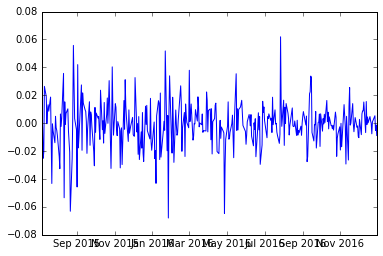

In [424]:
%matplotlib inline
fig1,ax=plt.subplots()
plt.plot(y_test,'b')

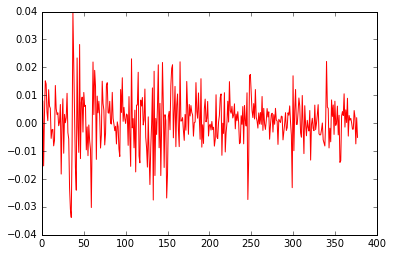

In [425]:
plt.plot(y_predictions,'r')